<a href="https://colab.research.google.com/github/ajitbit/machine-learning-interview-questions/blob/master/Proj1_Real_Estate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import time
import random
from math import *
import operator

# import plotting libraries
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline 

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df_train=pd.read_csv("train.csv")
df_test=pd.read_csv("test.csv")

In [3]:
df_train.columns

Index(['UID', 'BLOCKID', 'SUMLEVEL', 'COUNTYID', 'STATEID', 'state',
       'state_ab', 'city', 'place', 'type', 'primary', 'zip_code', 'area_code',
       'lat', 'lng', 'ALand', 'AWater', 'pop', 'male_pop', 'female_pop',
       'rent_mean', 'rent_median', 'rent_stdev', 'rent_sample_weight',
       'rent_samples', 'rent_gt_10', 'rent_gt_15', 'rent_gt_20', 'rent_gt_25',
       'rent_gt_30', 'rent_gt_35', 'rent_gt_40', 'rent_gt_50',
       'universe_samples', 'used_samples', 'hi_mean', 'hi_median', 'hi_stdev',
       'hi_sample_weight', 'hi_samples', 'family_mean', 'family_median',
       'family_stdev', 'family_sample_weight', 'family_samples',
       'hc_mortgage_mean', 'hc_mortgage_median', 'hc_mortgage_stdev',
       'hc_mortgage_sample_weight', 'hc_mortgage_samples', 'hc_mean',
       'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight',
       'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt',
       'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', '

In [4]:
df_test.columns

Index(['UID', 'BLOCKID', 'SUMLEVEL', 'COUNTYID', 'STATEID', 'state',
       'state_ab', 'city', 'place', 'type', 'primary', 'zip_code', 'area_code',
       'lat', 'lng', 'ALand', 'AWater', 'pop', 'male_pop', 'female_pop',
       'rent_mean', 'rent_median', 'rent_stdev', 'rent_sample_weight',
       'rent_samples', 'rent_gt_10', 'rent_gt_15', 'rent_gt_20', 'rent_gt_25',
       'rent_gt_30', 'rent_gt_35', 'rent_gt_40', 'rent_gt_50',
       'universe_samples', 'used_samples', 'hi_mean', 'hi_median', 'hi_stdev',
       'hi_sample_weight', 'hi_samples', 'family_mean', 'family_median',
       'family_stdev', 'family_sample_weight', 'family_samples',
       'hc_mortgage_mean', 'hc_mortgage_median', 'hc_mortgage_stdev',
       'hc_mortgage_sample_weight', 'hc_mortgage_samples', 'hc_mean',
       'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight',
       'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt',
       'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', '

In [5]:
df_test.head()

,UID,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,primary,zip_code,area_code,lat,lng,ALand,AWater,pop,male_pop,female_pop,rent_mean,rent_median,rent_stdev,rent_sample_weight,rent_samples,rent_gt_10,rent_gt_15,rent_gt_20,rent_gt_25,rent_gt_30,rent_gt_35,rent_gt_40,rent_gt_50,universe_samples,used_samples,hi_mean,hi_median,hi_stdev,hi_sample_weight,hi_samples,family_mean,family_median,family_stdev,family_sample_weight,family_samples,hc_mortgage_mean,hc_mortgage_median,hc_mortgage_stdev,hc_mortgage_sample_weight,hc_mortgage_samples,hc_mean,hc_median,hc_stdev,hc_samples,hc_sample_weight,home_equity_second_mortgage,second_mortgage,home_equity,debt,second_mortgage_cdf,home_equity_cdf,debt_cdf,hs_degree,hs_degree_male,hs_degree_female,male_age_mean,male_age_median,male_age_stdev,male_age_sample_weight,male_age_samples,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
0,255504,NaN,140,163,26,Michigan,MI,Detroit,Dearborn Heights City,CDP,tract,48239,313,42.346422,-83.252823,2711280,39555,3417,1479,1938,858.57169,859.0,232.39082,276.07497,424.0,1.00000,0.95696,0.85316,0.85316,0.85316,0.85316,0.76962,0.63544,435,395,48899.52121,38746.0,44392.20902,798.02401,1180.0,53802.87122,45167.0,43756.56479,464.30972,769.0,1139.24548,1109.0,336.47710,262.67011,474.0,488.51323,436.0,192.75147,271.0,189.18182,0.06443,0.06443,0.07651,0.63624,0.14111,0.55087,0.51965,0.91047,0.92010,0.90391,33.37131,27.83333,22.36768,334.30978,1479.0,34.78682,33.75000,21.58531,416.48097,1938.0,0.70252,0.28217,0.05910,0.03813,0.14299
1,252676,NaN,140,1,23,Maine,ME,Auburn,Auburn City,City,tract,4210,207,44.100724,-70.257832,14778785,2705204,3796,1846,1950,832.68625,750.0,267.22342,183.32299,245.0,1.00000,1.00000,0.86611,0.67364,0.30962,0.30962,0.30962,0.27197,275,239,72335.33234,61008.0,51895.81159,922.82969,1722.0,85642.22095,74759.0,49156.72870,482.99945,1147.0,1533.25988,1438.0,536.61118,373.96188,937.0,661.31296,668.0,201.31365,510.0,279.69697,0.01175,0.01175,0.14375,0.64755,0.52310,0.26442,0.49359,0.94290,0.92832,0.95736,43.88680,46.08333,22.90302,427.10824,1846.0,44.23451,46.66667,22.37036,532.03505,1950.0,0.85128,0.64221,0.02338,0.00000,0.13377
2,276314,NaN,140,15,42,Pennsylvania,PA,Pine City,Millerton,Borough,tract,14871,607,41.948556,-76.783808,258903666,863840,3944,2065,1879,816.00639,755.0,416.25699,141.39063,217.0,0.97573,0.93204,0.78641,0.71845,0.63592,0.47573,0.43689,0.32524,245,206,58501.15901,51648.0,45245.27248,893.07759,1461.0,65694.06582,57186.0,44239.31893,619.73962,1084.0,1254.54462,1089.0,596.85204,340.45884,552.0,397.44466,356.0,189.40372,664.0,534.16737,0.01069,0.01316,0.06497,0.45395,0.51066,0.60484,0.83848,0.89238,0.86003,0.92463,39.81661,41.91667,24.29111,499.10080,2065.0,41.62426,44.50000,22.86213,453.11959,1879.0,0.81897,0.59961,0.01746,0.01358,0.10026
3,248614,NaN,140,231,21,Kentucky,KY,Monticello,Monticello City,City,tract,42633,606,36.746009,-84.766870,501694825,2623067,2508,1427,1081,418.68937,385.0,156.92024,88.95960,93.0,1.00000,0.93548,0.93548,0.64516,0.55914,0.46237,0.46237,0.36559,153,93,38237.55059,31612.0,34527.61607,775.17947,957.0,44156.38709,34687.0,34899.74300,535.21987,689.0,862.65763,749.0,624.42157,299.56752,337.0,200.88113,180.0,91.56490,467.0,454.85404,0.00995,0.00995,0.01741,0.41915,0.53770,0.80931,0.87403,0.60908,0.56584,0.65947,41.81638,43.00000,24.65325,333.57733,1427.0,44.81200,48.00000,21.03155,263.94320,1081.0,0.84609,0.56953,0.05492,0.04694,0.12489
4,286865,NaN,140,355,48,Texas,TX,Corpus Christi,Edroy,Town,tract,78410,361,27.882461,-97.678586,13796057,497689,6230,3274,2956,1031.63763,997.0,326.76727,277.39844,624.0,0.72276,0.66506,0.53526,0.38301,0.18910,0.16667,0.14263,0.11058,660,624,114456.07790,94211.0,81950.95692,836.30759,2404.0,123527.02420,103898.0,72173.55823,507.42257,1738.0,1996.41425,1907.0,740.21168,319.97570,1102.0,867.57713,804.0,376.20236,642.0,333.91919,0.00000,0.00000,0.03440,0.63188,1.000

In [6]:
df_train.head()

,UID,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,primary,zip_code,area_code,lat,lng,ALand,AWater,pop,male_pop,female_pop,rent_mean,rent_median,rent_stdev,rent_sample_weight,rent_samples,rent_gt_10,rent_gt_15,rent_gt_20,rent_gt_25,rent_gt_30,rent_gt_35,rent_gt_40,rent_gt_50,universe_samples,used_samples,hi_mean,hi_median,hi_stdev,hi_sample_weight,hi_samples,family_mean,family_median,family_stdev,family_sample_weight,family_samples,hc_mortgage_mean,hc_mortgage_median,hc_mortgage_stdev,hc_mortgage_sample_weight,hc_mortgage_samples,hc_mean,hc_median,hc_stdev,hc_samples,hc_sample_weight,home_equity_second_mortgage,second_mortgage,home_equity,debt,second_mortgage_cdf,home_equity_cdf,debt_cdf,hs_degree,hs_degree_male,hs_degree_female,male_age_mean,male_age_median,male_age_stdev,male_age_sample_weight,male_age_samples,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
0,267822,NaN,140,53,36,New York,NY,Hamilton,Hamilton,City,tract,13346,315,42.840812,-75.501524,202183361.0,1699120,5230,2612,2618,769.38638,784.0,232.63967,272.34441,362.0,0.86761,0.79155,0.59155,0.45634,0.42817,0.18592,0.15493,0.12958,387,355,63125.28406,48120.0,49042.01206,1290.96240,2024.0,67994.14790,53245.0,47667.30119,884.33516,1491.0,1414.80295,1223.0,641.22898,377.83135,867.0,570.01530,558.0,270.11299,770.0,499.29293,0.01588,0.02077,0.08919,0.52963,0.43658,0.49087,0.73341,0.89288,0.85880,0.92434,42.48574,44.00000,22.97306,696.42136,2612.0,44.48629,45.33333,22.51276,685.33845,2618.0,0.79046,0.57851,0.01882,0.01240,0.08770
1,246444,NaN,140,141,18,Indiana,IN,South Bend,Roseland,City,tract,46616,574,41.701441,-86.266614,1560828.0,100363,2633,1349,1284,804.87924,848.0,253.46747,312.58622,513.0,0.97410,0.93227,0.69920,0.69920,0.55179,0.41235,0.39044,0.27888,542,502,41931.92593,35186.0,31639.50203,838.74664,1127.0,50670.10337,43023.0,34715.57548,375.28798,554.0,864.41390,784.0,482.27020,316.88320,356.0,351.98293,336.0,125.40457,229.0,189.60606,0.02222,0.02222,0.04274,0.60855,0.42174,0.70823,0.58120,0.90487,0.86947,0.94187,34.84728,32.00000,20.37452,323.90204,1349.0,36.48391,37.58333,23.43353,267.23367,1284.0,0.52483,0.34886,0.01426,0.01426,0.09030
2,245683,NaN,140,63,18,Indiana,IN,Danville,Danville,City,tract,46122,317,39.792202,-86.515246,69561595.0,284193,6881,3643,3238,742.77365,703.0,323.39011,291.85520,378.0,0.95238,0.88624,0.79630,0.66667,0.39153,0.39153,0.28307,0.15873,459,378,84942.68317,74964.0,56811.62186,1155.20980,2488.0,95262.51431,85395.0,49292.67664,709.74925,1889.0,1506.06758,1361.0,731.89394,699.41354,1491.0,556.45986,532.0,184.42175,538.0,323.35354,0.00000,0.00000,0.09512,0.73484,1.00000,0.46332,0.28704,0.94288,0.94616,0.93952,39.38154,40.83333,22.89769,888.29730,3643.0,42.15810,42.83333,23.94119,707.01963,3238.0,0.85331,0.64745,0.02830,0.01607,0.10657
3,279653,NaN,140,127,72,Puerto Rico,PR,San Juan,Guaynabo,Urban,tract,927,787,18.396103,-66.104169,1105793.0,0,2700,1141,1559,803.42018,782.0,297.39258,259.30316,368.0,0.94693,0.87151,0.69832,0.61732,0.51397,0.46927,0.35754,0.32961,438,358,48733.67116,37845.0,45100.54010,928.32193,1267.0,56401.68133,44399.0,41082.90515,490.18479,729.0,1175.28642,1101.0,428.98751,261.28471,437.0,288.04047,247.0,185.55887,392.0,314.90566,0.01086,0.01086,0.01086,0.52714,0.53057,0.82530,0.73727,0.91500,0.90755,0.92043,48.64749,48.91667,23.05968,274.98956,1141.0,47.77526,50.58333,24.32015,362.20193,1559.0,0.65037,0.47257,0.02021,0.02021,0.10106
4,247218,NaN,140,161,20,Kansas,KS,Manhattan,Manhattan City,City,tract,66502,785,39.195573,-96.569366,2554403.0,0,5637,2586,3051,938.56493,881.0,392.44096,1005.42886,1704.0,0.99286,0.98247,0.91688,0.84740,0.78247,0.60974,0.55455,0.44416,1725,1540,31834.15466,22497.0,34046.50907,1548.67477,1983.0,54053.42396,50272.0,39609.12605,244.08903,395.0,1192.58759,1125.0,327.49674,76.61052,134.0,443.68855,444.0,76.12674,124.0,79.55556,0.05426,0.05426,0.05426,0.51938,0.18332,0.65545,0.7496

In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11709 entries, 0 to 11708
Data columns (total 80 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   UID                          11709 non-null  int64  
 1   BLOCKID                      0 non-null      float64
 2   SUMLEVEL                     11709 non-null  int64  
 3   COUNTYID                     11709 non-null  int64  
 4   STATEID                      11709 non-null  int64  
 5   state                        11709 non-null  object 
 6   state_ab                     11709 non-null  object 
 7   city                         11709 non-null  object 
 8   place                        11709 non-null  object 
 9   type                         11709 non-null  object 
 10  primary                      11709 non-null  object 
 11  zip_code                     11709 non-null  int64  
 12  area_code                    11709 non-null  int64  
 13  lat             

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27321 entries, 0 to 27320
Data columns (total 80 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   UID                          27321 non-null  int64  
 1   BLOCKID                      0 non-null      float64
 2   SUMLEVEL                     27321 non-null  int64  
 3   COUNTYID                     27321 non-null  int64  
 4   STATEID                      27321 non-null  int64  
 5   state                        27321 non-null  object 
 6   state_ab                     27321 non-null  object 
 7   city                         27321 non-null  object 
 8   place                        27321 non-null  object 
 9   type                         27321 non-null  object 
 10  primary                      27321 non-null  object 
 11  zip_code                     27321 non-null  int64  
 12  area_code                    27321 non-null  int64  
 13  lat             

In [9]:
#UID is unique userID value in the train and test dataset. So an index can be created from the UID feature
df_train.set_index(keys=['UID'],inplace=True)#Set the DataFrame index using existing columns.
df_test.set_index(keys=['UID'],inplace=True)

In [10]:
df_train.head()

,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,primary,zip_code,area_code,lat,lng,ALand,AWater,pop,male_pop,female_pop,rent_mean,rent_median,rent_stdev,rent_sample_weight,rent_samples,rent_gt_10,rent_gt_15,rent_gt_20,rent_gt_25,rent_gt_30,rent_gt_35,rent_gt_40,rent_gt_50,universe_samples,used_samples,hi_mean,hi_median,hi_stdev,hi_sample_weight,hi_samples,family_mean,family_median,family_stdev,family_sample_weight,family_samples,hc_mortgage_mean,hc_mortgage_median,hc_mortgage_stdev,hc_mortgage_sample_weight,hc_mortgage_samples,hc_mean,hc_median,hc_stdev,hc_samples,hc_sample_weight,home_equity_second_mortgage,second_mortgage,home_equity,debt,second_mortgage_cdf,home_equity_cdf,debt_cdf,hs_degree,hs_degree_male,hs_degree_female,male_age_mean,male_age_median,male_age_stdev,male_age_sample_weight,male_age_samples,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
UID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
267822,NaN,140,53,36,New York,NY,Hamilton,Hamilton,City,tract,13346,315,42.840812,-75.501524,202183361.0,1699120,5230,2612,2618,769.38638,784.0,232.63967,272.34441,362.0,0.86761,0.79155,0.59155,0.45634,0.42817,0.18592,0.15493,0.12958,387,355,63125.28406,48120.0,49042.01206,1290.96240,2024.0,67994.14790,53245.0,47667.30119,884.33516,1491.0,1414.80295,1223.0,641.22898,377.83135,867.0,570.01530,558.0,270.11299,770.0,499.29293,0.01588,0.02077,0.08919,0.52963,0.43658,0.49087,0.73341,0.89288,0.85880,0.92434,42.48574,44.00000,22.97306,696.42136,2612.0,44.48629,45.33333,22.51276,685.33845,2618.0,0.79046,0.57851,0.01882,0.01240,0.08770
246444,NaN,140,141,18,Indiana,IN,South Bend,Roseland,City,tract,46616,574,41.701441,-86.266614,1560828.0,100363,2633,1349,1284,804.87924,848.0,253.46747,312.58622,513.0,0.97410,0.93227,0.69920,0.69920,0.55179,0.41235,0.39044,0.27888,542,502,41931.92593,35186.0,31639.50203,838.74664,1127.0,50670.10337,43023.0,34715.57548,375.28798,554.0,864.41390,784.0,482.27020,316.88320,356.0,351.98293,336.0,125.40457,229.0,189.60606,0.02222,0.02222,0.04274,0.60855,0.42174,0.70823,0.58120,0.90487,0.86947,0.94187,34.84728,32.00000,20.37452,323.90204,1349.0,36.48391,37.58333,23.43353,267.23367,1284.0,0.52483,0.34886,0.01426,0.01426,0.09030
245683,NaN,140,63,18,Indiana,IN,Danville,Danville,City,tract,46122,317,39.792202,-86.515246,69561595.0,284193,6881,3643,3238,742.77365,703.0,323.39011,291.85520,378.0,0.95238,0.88624,0.79630,0.66667,0.39153,0.39153,0.28307,0.15873,459,378,84942.68317,74964.0,56811.62186,1155.20980,2488.0,95262.51431,85395.0,49292.67664,709.74925,1889.0,1506.06758,1361.0,731.89394,699.41354,1491.0,556.45986,532.0,184.42175,538.0,323.35354,0.00000,0.00000,0.09512,0.73484,1.00000,0.46332,0.28704,0.94288,0.94616,0.93952,39.38154,40.83333,22.89769,888.29730,3643.0,42.15810,42.83333,23.94119,707.01963,3238.0,0.85331,0.64745,0.02830,0.01607,0.10657
279653,NaN,140,127,72,Puerto Rico,PR,San Juan,Guaynabo,Urban,tract,927,787,18.396103,-66.104169,1105793.0,0,2700,1141,1559,803.42018,782.0,297.39258,259.30316,368.0,0.94693,0.87151,0.69832,0.61732,0.51397,0.46927,0.35754,0.32961,438,358,48733.67116,37845.0,45100.54010,928.32193,1267.0,56401.68133,44399.0,41082.90515,490.18479,729.0,1175.28642,1101.0,428.98751,261.28471,437.0,288.04047,247.0,185.55887,392.0,314.90566,0.01086,0.01086,0.01086,0.52714,0.53057,0.82530,0.73727,0.91500,0.90755,0.92043,48.64749,48.91667,23.05968,274.98956,1141.0,47.77526,50.58333,24.32015,362.20193,1559.0,0.65037,0.47257,0.02021,0.02021,0.10106
247218,NaN,140,161,20,Kansas,KS,Manhattan,Manhattan City,City,tract,66502,785,39.195573,-96.569366,2554403.0,0,5637,2586,3051,938.56493,881.0,392.44096,1005.42886,1704.0,0.99286,0.98247,0.91688,0.84740,0.78247,0.60974,0.55455,0.44416,1725,1540,31834.15466,22497.0,34046.50907,1548.67477,1983.0,54053.42396,50272.0,39609.12605,244.08903,395.0,1192.58759,1125.0,327.49674,76.61052,134.0,443.68855,444.0,76.12674,

In [11]:
df_test.head()

,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,primary,zip_code,area_code,lat,lng,ALand,AWater,pop,male_pop,female_pop,rent_mean,rent_median,rent_stdev,rent_sample_weight,rent_samples,rent_gt_10,rent_gt_15,rent_gt_20,rent_gt_25,rent_gt_30,rent_gt_35,rent_gt_40,rent_gt_50,universe_samples,used_samples,hi_mean,hi_median,hi_stdev,hi_sample_weight,hi_samples,family_mean,family_median,family_stdev,family_sample_weight,family_samples,hc_mortgage_mean,hc_mortgage_median,hc_mortgage_stdev,hc_mortgage_sample_weight,hc_mortgage_samples,hc_mean,hc_median,hc_stdev,hc_samples,hc_sample_weight,home_equity_second_mortgage,second_mortgage,home_equity,debt,second_mortgage_cdf,home_equity_cdf,debt_cdf,hs_degree,hs_degree_male,hs_degree_female,male_age_mean,male_age_median,male_age_stdev,male_age_sample_weight,male_age_samples,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
UID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
255504,NaN,140,163,26,Michigan,MI,Detroit,Dearborn Heights City,CDP,tract,48239,313,42.346422,-83.252823,2711280,39555,3417,1479,1938,858.57169,859.0,232.39082,276.07497,424.0,1.00000,0.95696,0.85316,0.85316,0.85316,0.85316,0.76962,0.63544,435,395,48899.52121,38746.0,44392.20902,798.02401,1180.0,53802.87122,45167.0,43756.56479,464.30972,769.0,1139.24548,1109.0,336.47710,262.67011,474.0,488.51323,436.0,192.75147,271.0,189.18182,0.06443,0.06443,0.07651,0.63624,0.14111,0.55087,0.51965,0.91047,0.92010,0.90391,33.37131,27.83333,22.36768,334.30978,1479.0,34.78682,33.75000,21.58531,416.48097,1938.0,0.70252,0.28217,0.05910,0.03813,0.14299
252676,NaN,140,1,23,Maine,ME,Auburn,Auburn City,City,tract,4210,207,44.100724,-70.257832,14778785,2705204,3796,1846,1950,832.68625,750.0,267.22342,183.32299,245.0,1.00000,1.00000,0.86611,0.67364,0.30962,0.30962,0.30962,0.27197,275,239,72335.33234,61008.0,51895.81159,922.82969,1722.0,85642.22095,74759.0,49156.72870,482.99945,1147.0,1533.25988,1438.0,536.61118,373.96188,937.0,661.31296,668.0,201.31365,510.0,279.69697,0.01175,0.01175,0.14375,0.64755,0.52310,0.26442,0.49359,0.94290,0.92832,0.95736,43.88680,46.08333,22.90302,427.10824,1846.0,44.23451,46.66667,22.37036,532.03505,1950.0,0.85128,0.64221,0.02338,0.00000,0.13377
276314,NaN,140,15,42,Pennsylvania,PA,Pine City,Millerton,Borough,tract,14871,607,41.948556,-76.783808,258903666,863840,3944,2065,1879,816.00639,755.0,416.25699,141.39063,217.0,0.97573,0.93204,0.78641,0.71845,0.63592,0.47573,0.43689,0.32524,245,206,58501.15901,51648.0,45245.27248,893.07759,1461.0,65694.06582,57186.0,44239.31893,619.73962,1084.0,1254.54462,1089.0,596.85204,340.45884,552.0,397.44466,356.0,189.40372,664.0,534.16737,0.01069,0.01316,0.06497,0.45395,0.51066,0.60484,0.83848,0.89238,0.86003,0.92463,39.81661,41.91667,24.29111,499.10080,2065.0,41.62426,44.50000,22.86213,453.11959,1879.0,0.81897,0.59961,0.01746,0.01358,0.10026
248614,NaN,140,231,21,Kentucky,KY,Monticello,Monticello City,City,tract,42633,606,36.746009,-84.766870,501694825,2623067,2508,1427,1081,418.68937,385.0,156.92024,88.95960,93.0,1.00000,0.93548,0.93548,0.64516,0.55914,0.46237,0.46237,0.36559,153,93,38237.55059,31612.0,34527.61607,775.17947,957.0,44156.38709,34687.0,34899.74300,535.21987,689.0,862.65763,749.0,624.42157,299.56752,337.0,200.88113,180.0,91.56490,467.0,454.85404,0.00995,0.00995,0.01741,0.41915,0.53770,0.80931,0.87403,0.60908,0.56584,0.65947,41.81638,43.00000,24.65325,333.57733,1427.0,44.81200,48.00000,21.03155,263.94320,1081.0,0.84609,0.56953,0.05492,0.04694,0.12489
286865,NaN,140,355,48,Texas,TX,Corpus Christi,Edroy,Town,tract,78410,361,27.882461,-97.678586,13796057,497689,6230,3274,2956,1031.63763,997.0,326.76727,277.39844,624.0,0.72276,0.66506,0.53526,0.38301,0.18910,0.16667,0.14263,0.11058,660,624,114456.07790,94211.0,81950.95692,836.30759,2404.0,123527.02420,103898.0,72173.55823,507.42257,1738.0,1996.41425,1907.0,740.21168,319.97570,1102.0,867.57713,

In [12]:
#percantage of missing values in train set
missing_list_train=df_train.isnull().sum() *100/len(df_train)
missing_values_df_train=pd.DataFrame(missing_list_train,columns=['Percantage of missing values'])
missing_values_df_train.sort_values(by=['Percantage of missing values'],inplace=True,ascending=False)
missing_values_df_train[missing_values_df_train['Percantage of missing values'] >0][:10]
#BLOCKID can be dropped, since it is 100%missing values

,Percantage of missing values
BLOCKID,100.000000
hc_samples,2.196113
hc_mean,2.196113
hc_median,2.196113
hc_stdev,2.196113
hc_sample_weight,2.196113
hc_mortgage_mean,2.097288
hc_mortgage_stdev,2.097288
hc_mortgage_sample_weight,2.097288
hc_mortgage_samples,2.097288


In [13]:
#percantage of missing values in test set
missing_list_test=df_test.isnull().sum() *100/len(df_train)
missing_values_df_test=pd.DataFrame(missing_list_test,columns=['Percantage of missing values'])
missing_values_df_test.sort_values(by=['Percantage of missing values'],inplace=True,ascending=False)
missing_values_df_test[missing_values_df_test['Percantage of missing values'] >0][:10]
#BLOCKID can be dropped, since it is 43%missing values

,Percantage of missing values
BLOCKID,42.857143
hc_samples,1.061455
hc_mean,1.061455
hc_median,1.061455
hc_stdev,1.061455
hc_sample_weight,1.061455
hc_mortgage_mean,0.980930
hc_mortgage_stdev,0.980930
hc_mortgage_sample_weight,0.980930
hc_mortgage_samples,0.980930


In [14]:
df_train .drop(columns=['BLOCKID','SUMLEVEL'],inplace=True) #SUMLEVEL doest not have any predictive power and no variance

In [15]:
df_test .drop(columns=['BLOCKID','SUMLEVEL'],inplace=True) #SUMLEVEL doest not have any predictive power

In [16]:
# Imputing  missing values with mean
missing_train_cols=[]
for col in df_train.columns:
    if df_train[col].isna().sum() !=0:
         missing_train_cols.append(col)
print(missing_train_cols)

['rent_mean', 'rent_median', 'rent_stdev', 'rent_sample_weight', 'rent_samples', 'rent_gt_10', 'rent_gt_15', 'rent_gt_20', 'rent_gt_25', 'rent_gt_30', 'rent_gt_35', 'rent_gt_40', 'rent_gt_50', 'hi_mean', 'hi_median', 'hi_stdev', 'hi_sample_weight', 'hi_samples', 'family_mean', 'family_median', 'family_stdev', 'family_sample_weight', 'family_samples', 'hc_mortgage_mean', 'hc_mortgage_median', 'hc_mortgage_stdev', 'hc_mortgage_sample_weight', 'hc_mortgage_samples', 'hc_mean', 'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight', 'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt', 'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', 'hs_degree', 'hs_degree_male', 'hs_degree_female', 'male_age_mean', 'male_age_median', 'male_age_stdev', 'male_age_sample_weight', 'male_age_samples', 'female_age_mean', 'female_age_median', 'female_age_stdev', 'female_age_sample_weight', 'female_age_samples', 'pct_own', 'married', 'married_snp', 'separated', 'divorced']


In [17]:
# Imputing  missing values with mean
missing_test_cols=[]
for col in df_test.columns:
    if df_test[col].isna().sum() !=0:
         missing_test_cols.append(col)
print(missing_test_cols)

['rent_mean', 'rent_median', 'rent_stdev', 'rent_sample_weight', 'rent_samples', 'rent_gt_10', 'rent_gt_15', 'rent_gt_20', 'rent_gt_25', 'rent_gt_30', 'rent_gt_35', 'rent_gt_40', 'rent_gt_50', 'hi_mean', 'hi_median', 'hi_stdev', 'hi_sample_weight', 'hi_samples', 'family_mean', 'family_median', 'family_stdev', 'family_sample_weight', 'family_samples', 'hc_mortgage_mean', 'hc_mortgage_median', 'hc_mortgage_stdev', 'hc_mortgage_sample_weight', 'hc_mortgage_samples', 'hc_mean', 'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight', 'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt', 'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', 'hs_degree', 'hs_degree_male', 'hs_degree_female', 'male_age_mean', 'male_age_median', 'male_age_stdev', 'male_age_sample_weight', 'male_age_samples', 'female_age_mean', 'female_age_median', 'female_age_stdev', 'female_age_sample_weight', 'female_age_samples', 'pct_own', 'married', 'married_snp', 'separated', 'divorced']


In [18]:
# Missing cols are all numerical variables
for col in df_train.columns:
    if col in (missing_train_cols):
        df_train[col].replace(np.nan, df_train[col].mean(),inplace=True)

In [19]:
# Missing cols are all numerical variables
for col in df_test.columns:
    if col in (missing_test_cols):
        df_test[col].replace(np.nan, df_test[col].mean(),inplace=True)

In [20]:
print("Train set: ", df_train.isna().sum().sum())
print("Test set: ", df_test.isna().sum().sum())

Train set:  0
Test set:  0


In [21]:
from pandasql import sqldf
q1 = "select place,pct_own,second_mortgage,lat,lng from df_train where pct_own >0.10 and second_mortgage <0.5 order by second_mortgage DESC LIMIT 2500;"
pysqldf = lambda q: sqldf(q, globals())
df_train_location_mort_pct=pysqldf(q1)

In [22]:
df_train_location_mort_pct.head()

,place,pct_own,second_mortgage,lat,lng
0,Worcester City,0.20247,0.43363,42.254262,-71.800347
1,Harbor Hills,0.15618,0.31818,40.751809,-73.853582
2,Glen Burnie,0.22380,0.30212,39.127273,-76.635265
3,Egypt Lake-leto,0.11618,0.28972,28.029063,-82.495395
4,Lincolnwood,0.14228,0.28899,41.967289,-87.652434


In [23]:
import plotly.express as px
import plotly.graph_objects as go

In [24]:

fig = go.Figure(data=go.Scattergeo(
    lat = df_train_location_mort_pct['lat'],
    lon = df_train_location_mort_pct['lng']),
    )
fig.update_layout(
    geo=dict(
        scope = 'north america',
        showland = True,
        landcolor = "rgb(212, 212, 212)",
        subunitcolor = "rgb(255, 255, 255)",
        countrycolor = "rgb(255, 255, 255)",
        showlakes = True,
        lakecolor = "rgb(255, 255, 255)",
        showsubunits = True,
        showcountries = True,
        resolution = 50,
        projection = dict(
            type = 'conic conformal',
            rotation_lon = -100
        ),
        lonaxis = dict(
            showgrid = True,
            gridwidth = 0.5,
            range= [ -140.0, -55.0 ],
            dtick = 5
        ),
        lataxis = dict (
            showgrid = True,
            gridwidth = 0.5,
            range= [ 20.0, 60.0 ],
            dtick = 5
        )
    ),
    title='Top 2,500 locations with second mortgage is the highest and percent ownership is above 100 percent')
fig.show()


In [25]:
df_train['bad_debt']=df_train['second_mortgage']+df_train['home_equity']-df_train['home_equity_second_mortgage']

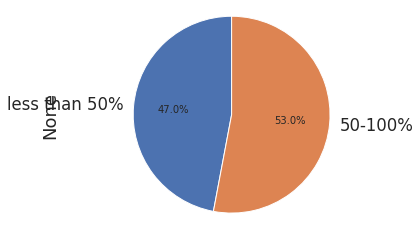

In [26]:
df_train['bins'] = pd.cut(df_train['bad_debt'],bins=[0,0.10,1], labels=["less than 50%","50-100%"])
df_train.groupby(['bins']).size().plot(kind='pie',subplots=True,startangle=90, autopct='%1.1f%%')
plt.axis('equal')

plt.show()
#df.plot.pie(subplots=True,figsize=(8, 3))

In [27]:
cols=[]
df_train.columns

Index(['COUNTYID', 'STATEID', 'state', 'state_ab', 'city', 'place', 'type',
       'primary', 'zip_code', 'area_code', 'lat', 'lng', 'ALand', 'AWater',
       'pop', 'male_pop', 'female_pop', 'rent_mean', 'rent_median',
       'rent_stdev', 'rent_sample_weight', 'rent_samples', 'rent_gt_10',
       'rent_gt_15', 'rent_gt_20', 'rent_gt_25', 'rent_gt_30', 'rent_gt_35',
       'rent_gt_40', 'rent_gt_50', 'universe_samples', 'used_samples',
       'hi_mean', 'hi_median', 'hi_stdev', 'hi_sample_weight', 'hi_samples',
       'family_mean', 'family_median', 'family_stdev', 'family_sample_weight',
       'family_samples', 'hc_mortgage_mean', 'hc_mortgage_median',
       'hc_mortgage_stdev', 'hc_mortgage_sample_weight', 'hc_mortgage_samples',
       'hc_mean', 'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight',
       'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt',
       'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', 'hs_degree',
       'hs_degree_male', 

In [28]:
#Taking Hamilton and Manhattan cities data
cols=['second_mortgage','home_equity','debt','bad_debt']
df_box_hamilton=df_train.loc[df_train['city'] == 'Hamilton']
df_box_manhattan=df_train.loc[df_train['city'] == 'Manhattan']
df_box_city=pd.concat([df_box_hamilton,df_box_manhattan])
df_box_city.head(4)

,COUNTYID,STATEID,state,state_ab,city,place,type,primary,zip_code,area_code,lat,lng,ALand,AWater,pop,male_pop,female_pop,rent_mean,rent_median,rent_stdev,rent_sample_weight,rent_samples,rent_gt_10,rent_gt_15,rent_gt_20,rent_gt_25,rent_gt_30,rent_gt_35,rent_gt_40,rent_gt_50,universe_samples,used_samples,hi_mean,hi_median,hi_stdev,hi_sample_weight,hi_samples,family_mean,family_median,family_stdev,family_sample_weight,family_samples,hc_mortgage_mean,hc_mortgage_median,hc_mortgage_stdev,hc_mortgage_sample_weight,hc_mortgage_samples,hc_mean,hc_median,hc_stdev,hc_samples,hc_sample_weight,home_equity_second_mortgage,second_mortgage,home_equity,debt,second_mortgage_cdf,home_equity_cdf,debt_cdf,hs_degree,hs_degree_male,hs_degree_female,male_age_mean,male_age_median,male_age_stdev,male_age_sample_weight,male_age_samples,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced,bad_debt,bins
UID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
267822,53,36,New York,NY,Hamilton,Hamilton,City,tract,13346,315,42.840812,-75.501524,202183361.0,1699120,5230,2612,2618,769.38638,784.0,232.63967,272.34441,362.0,0.86761,0.79155,0.59155,0.45634,0.42817,0.18592,0.15493,0.12958,387,355,63125.28406,48120.0,49042.01206,1290.96240,2024.0,67994.14790,53245.0,47667.30119,884.33516,1491.0,1414.80295,1223.0,641.22898,377.83135,867.0,570.01530,558.0,270.11299,770.0,499.29293,0.01588,0.02077,0.08919,0.52963,0.43658,0.49087,0.73341,0.89288,0.85880,0.92434,42.48574,44.00000,22.97306,696.42136,2612.0,44.48629,45.33333,22.51276,685.33845,2618.0,0.79046,0.57851,0.01882,0.01240,0.08770,0.09408,less than 50%
263797,21,34,New Jersey,NJ,Hamilton,Yardville,City,tract,8610,609,40.206266,-74.675274,4623635.0,75545,5050,1926,3124,1299.55492,1106.0,476.90596,273.50240,982.0,1.00000,0.84746,0.68114,0.60169,0.36335,0.25530,0.23835,0.17055,1000,944,80521.77955,61619.0,64319.32971,1476.17237,2721.0,117179.87740,105448.0,62810.85492,353.10227,1144.0,1865.82107,1672.0,874.41806,431.82729,1283.0,774.11639,780.0,183.95710,438.0,224.36364,0.01859,0.03021,0.16909,0.74550,0.34594,0.18660,0.26368,0.94187,0.96176,0.93029,44.17886,43.75000,21.65283,446.96441,1926.0,52.81825,55.00000,24.05831,732.58443,3124.0,0.64400,0.56377,0.01980,0.00990,0.04892,0.18071,50-100%
270979,17,39,Ohio,OH,Hamilton,Hamilton City,Village,tract,45015,513,39.364028,-84.570717,3598447.0,112290,4615,2087,2528,687.22347,719.0,277.66094,534.12791,687.0,0.98399,0.88501,0.77001,0.62591,0.51092,0.42504,0.33770,0.22853,693,687,53074.46754,39319.0,48747.89548,1202.21734,1726.0,59345.58535,43927.0,48015.86057,744.58085,1088.0,1011.30380,995.0,246.23596,514.75102,729.0,320.70619,318.0,101.22659,304.0,270.16162,0.04743,0.04743,0.15005,0.70571,0.21952,0.24346,0.35449,0.83930,0.85614,0.82438,35.35287,35.83333,19.97726,502.14915,2087.0,35.13247,31.66667,22.66500,565.32725,2528.0,0.61278,0.47397,0.04419,0.02663,0.13741,0.15005,50-100%
259028,95,28,Mississippi,MS,Hamilton,Hamilton,CDP,tract,39746,662,33.759514,-88.377770,235934245.0,710507,3783,1829,1954,659.65320,755.0,161.98765,137.40404,147.0,0.92174,0.84348,0.69565,0.20870,0.20870,0.20870,0.20870,0.13913,221,115,56218.87091,47965.0,51357.62464,810.61414,1301.0,64115.06976,55171.0,48135.02541,585.00426,1019.0,1151.71231,1011.0,469.03313,280.60828,409.0,386.92921,329.0,186.69331,671.0,536.61202,0.00000,0.00000,0.02130,0.37870,1.00000,0.79686,0.90663,0.82507,0.79527,0.85023,35.35016,33.25000,22.58558,444.45947,1829.0,37.53793,35.91667,22.79602,483.01311,1954.0,0.83241,0.58678,0.01052,0.00000,0.11721,0.02130,less than 50%


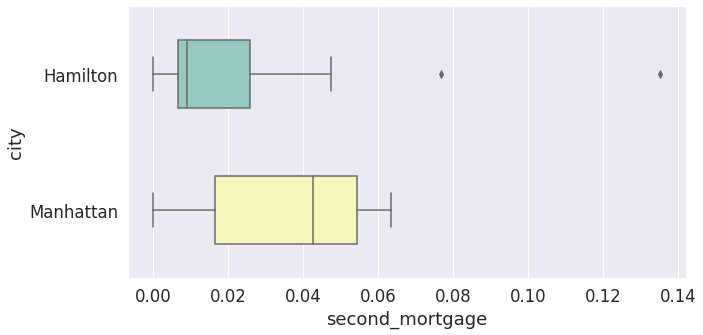

In [29]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df_box_city,x='second_mortgage', y='city',width=0.5,palette="Set3")
plt.show()

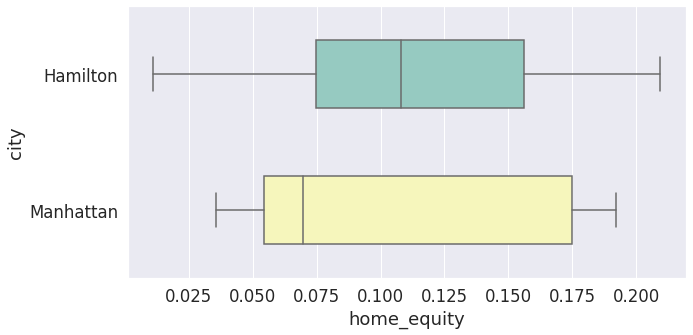

In [30]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df_box_city,x='home_equity', y='city',width=0.5,palette="Set3")
plt.show()

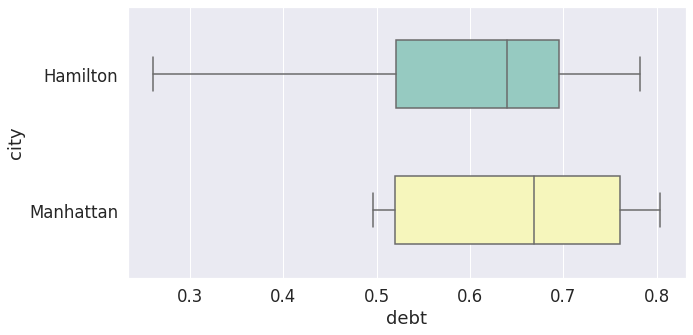

In [31]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df_box_city,x='debt', y='city',width=0.5,palette="Set3")
plt.show()

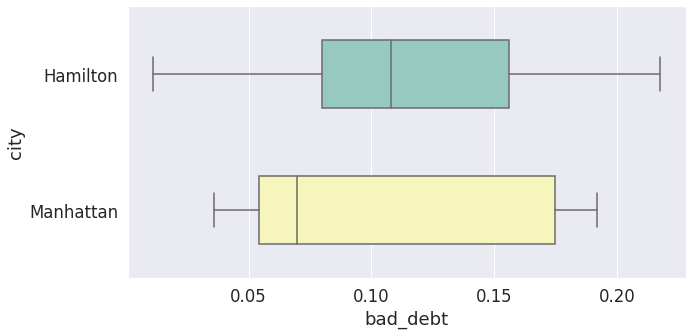

In [32]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df_box_city,x='bad_debt', y='city',width=0.5,palette="Set3")
plt.show()

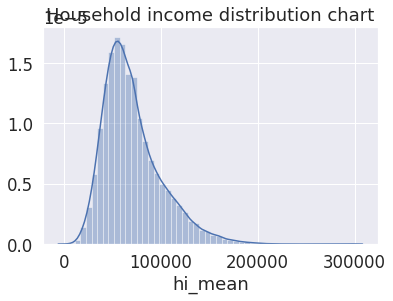

In [33]:
sns.distplot(df_train['hi_mean'])
plt.title('Household income distribution chart')
plt.show()

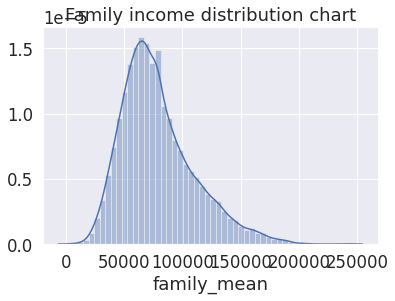

In [34]:
sns.distplot(df_train['family_mean'])
plt.title('Family income distribution chart')
plt.show()

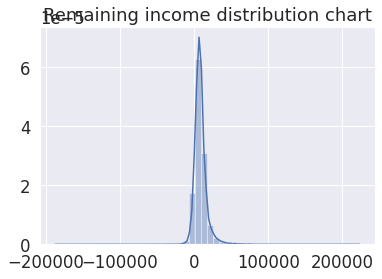

In [35]:
sns.distplot(df_train['family_mean']-df_train['hi_mean'])
plt.title('Remaining income distribution chart')
plt.show()

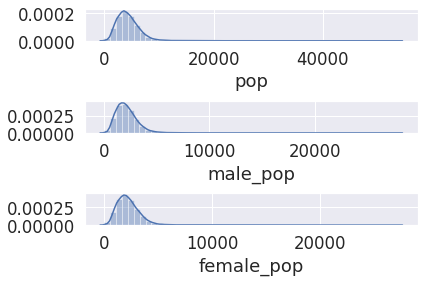

In [37]:
#plt.figure(figsize=(25,10))
fig,(ax1,ax2,ax3)=plt.subplots(3,1)
sns.distplot(df_train['pop'],ax=ax1)
sns.distplot(df_train['male_pop'],ax=ax2)
sns.distplot(df_train['female_pop'],ax=ax3)
plt.subplots_adjust(wspace=0.8,hspace=0.8)
plt.tight_layout()
plt.show()

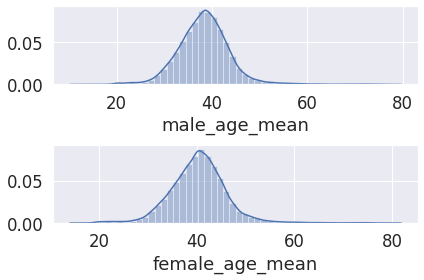

In [38]:
#plt.figure(figsize=(25,10))
fig,(ax1,ax2)=plt.subplots(2,1)
sns.distplot(df_train['male_age_mean'],ax=ax1)
sns.distplot(df_train['female_age_mean'],ax=ax2)
plt.subplots_adjust(wspace=0.8,hspace=0.8)
plt.tight_layout()
plt.show()

In [39]:
df_train['pop_density']=df_train['pop']/df_train['ALand']

In [40]:
df_test['pop_density']=df_test['pop']/df_test['ALand']

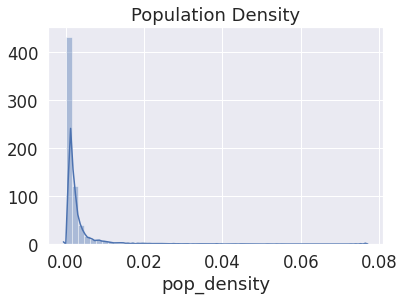

In [41]:
sns.distplot(df_train['pop_density'])
plt.title('Population Density')
plt.show() # Very less density is noticed

In [42]:
df_train['age_median']=(df_train['male_age_median']+df_train['female_age_median'])/2
df_test['age_median']=(df_test['male_age_median']+df_test['female_age_median'])/2

In [43]:
df_train[['male_age_median','female_age_median','male_pop','female_pop','age_median']].head()

,male_age_median,female_age_median,male_pop,female_pop,age_median
UID,,,,,
267822,44.00000,45.33333,2612,2618,44.666665
246444,32.00000,37.58333,1349,1284,34.791665
245683,40.83333,42.83333,3643,3238,41.833330
279653,48.91667,50.58333,1141,1559,49.750000
247218,22.41667,21.58333,2586,3051,22.000000


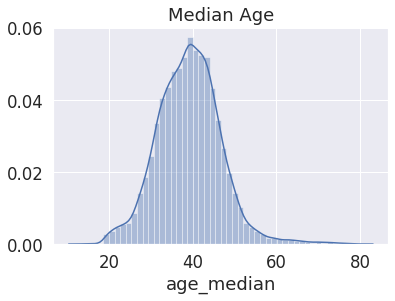

In [44]:
sns.distplot(df_train['age_median'])
plt.title('Median Age')
plt.show()
# Age of population is mostly between 20 and 60
# Majority are of age around 40
# Median age distribution has a gaussian distribution
# Some right skewness is noticed

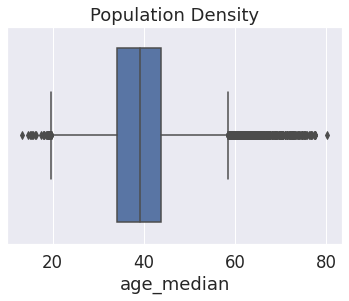

In [45]:
sns.boxplot(df_train['age_median'])
plt.title('Population Density')
plt.show() 

In [46]:
df_train['pop'].describe()

count    27321.000000
mean      4316.032685
std       2169.226173
min          0.000000
25%       2885.000000
50%       4042.000000
75%       5430.000000
max      53812.000000
Name: pop, dtype: float64

In [47]:
df_train['pop_bins']=pd.cut(df_train['pop'],bins=5,labels=['very low','low','medium','high','very high'])

In [48]:
df_train[['pop','pop_bins']]

,pop,pop_bins
UID,,
267822,5230,very low
246444,2633,very low
245683,6881,very low
279653,2700,very low
247218,5637,very low
...,...,...
279212,1847,very low
277856,4155,very low
233000,2829,very low


In [49]:
df_train['pop_bins'].value_counts()

very low     27058
low            246
medium           9
high             7
very high        1
Name: pop_bins, dtype: int64

In [50]:
df_train.groupby(by='pop_bins')[['married','separated','divorced']].count()

,married,separated,divorced
pop_bins,,,
very low,27058,27058,27058
low,246,246,246
medium,9,9,9
high,7,7,7
very high,1,1,1


In [51]:
df_train.groupby(by='pop_bins')[['married','separated','divorced']].agg(["mean", "median"])

married           separated            divorced          
               mean    median      mean    median      mean    median
pop_bins                                                             
very low   0.507548  0.524680  0.019126  0.013650  0.100504  0.096020
low        0.584894  0.593135  0.015833  0.011195  0.075348  0.070045
medium     0.655737  0.618710  0.005003  0.004120  0.065927  0.064890
high       0.503359  0.335660  0.008141  0.002500  0.039030  0.010320
very high  0.734740  0.734740  0.004050  0.004050  0.030360  0.030360

<Figure size 720x360 with 0 Axes>

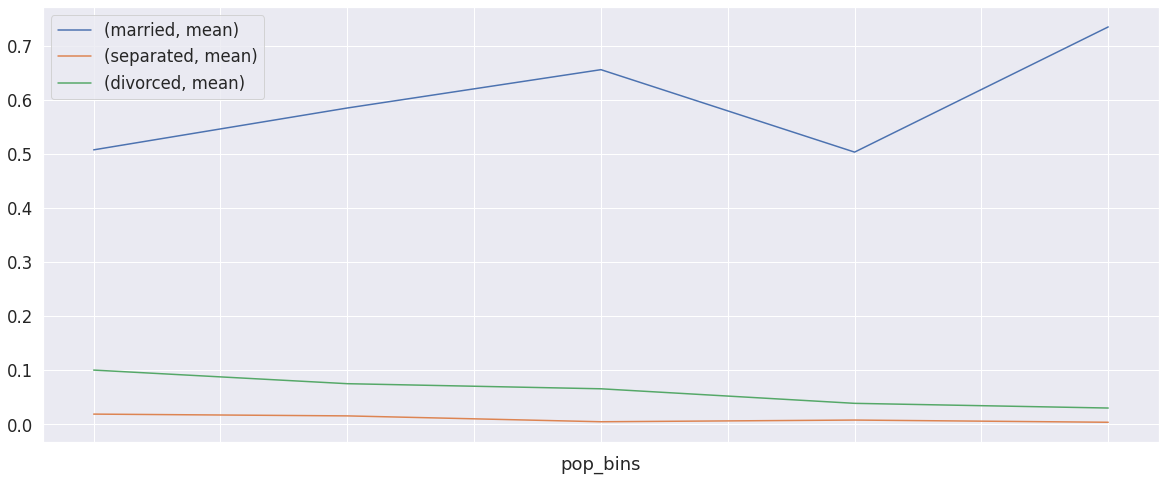

In [52]:
plt.figure(figsize=(10,5))
pop_bin_married=df_train.groupby(by='pop_bins')[['married','separated','divorced']].agg(["mean"])
pop_bin_married.plot(figsize=(20,8))
plt.legend(loc='best')
plt.show()

In [53]:
rent_state_mean=df_train.groupby(by='state')['rent_mean'].agg(["mean"])
rent_state_mean.head()

,mean
state,
Alabama,774.004927
Alaska,1185.763570
Arizona,1097.753511
Arkansas,720.918575
California,1471.133857


In [54]:
income_state_mean=df_train.groupby(by='state')['family_mean'].agg(["mean"])
income_state_mean.head()

,mean
state,
Alabama,67030.064213
Alaska,92136.545109
Arizona,73328.238798
Arkansas,64765.377850
California,87655.470820


In [55]:
rent_perc_of_income=rent_state_mean['mean']/income_state_mean['mean']
rent_perc_of_income.head(10)

state
Alabama                 0.011547
Alaska                  0.012870
Arizona                 0.014970
Arkansas                0.011131
California              0.016783
Colorado                0.013529
Connecticut             0.012637
Delaware                0.012929
District of Columbia    0.013198
Florida                 0.015772
Name: mean, dtype: float64

In [56]:
#overall level rent as a percentage of income
sum(df_train['rent_mean'])/sum(df_train['family_mean'])

0.013358170721473864

In [57]:
df_train.columns

Index(['COUNTYID', 'STATEID', 'state', 'state_ab', 'city', 'place', 'type',
       'primary', 'zip_code', 'area_code', 'lat', 'lng', 'ALand', 'AWater',
       'pop', 'male_pop', 'female_pop', 'rent_mean', 'rent_median',
       'rent_stdev', 'rent_sample_weight', 'rent_samples', 'rent_gt_10',
       'rent_gt_15', 'rent_gt_20', 'rent_gt_25', 'rent_gt_30', 'rent_gt_35',
       'rent_gt_40', 'rent_gt_50', 'universe_samples', 'used_samples',
       'hi_mean', 'hi_median', 'hi_stdev', 'hi_sample_weight', 'hi_samples',
       'family_mean', 'family_median', 'family_stdev', 'family_sample_weight',
       'family_samples', 'hc_mortgage_mean', 'hc_mortgage_median',
       'hc_mortgage_stdev', 'hc_mortgage_sample_weight', 'hc_mortgage_samples',
       'hc_mean', 'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight',
       'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt',
       'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', 'hs_degree',
       'hs_degree_male', 

In [58]:
cor=df_train[['COUNTYID','STATEID','zip_code','type','pop', 'family_mean',
         'second_mortgage', 'home_equity', 'debt','hs_degree',
           'age_median','pct_own', 'married','separated', 'divorced']].corr()

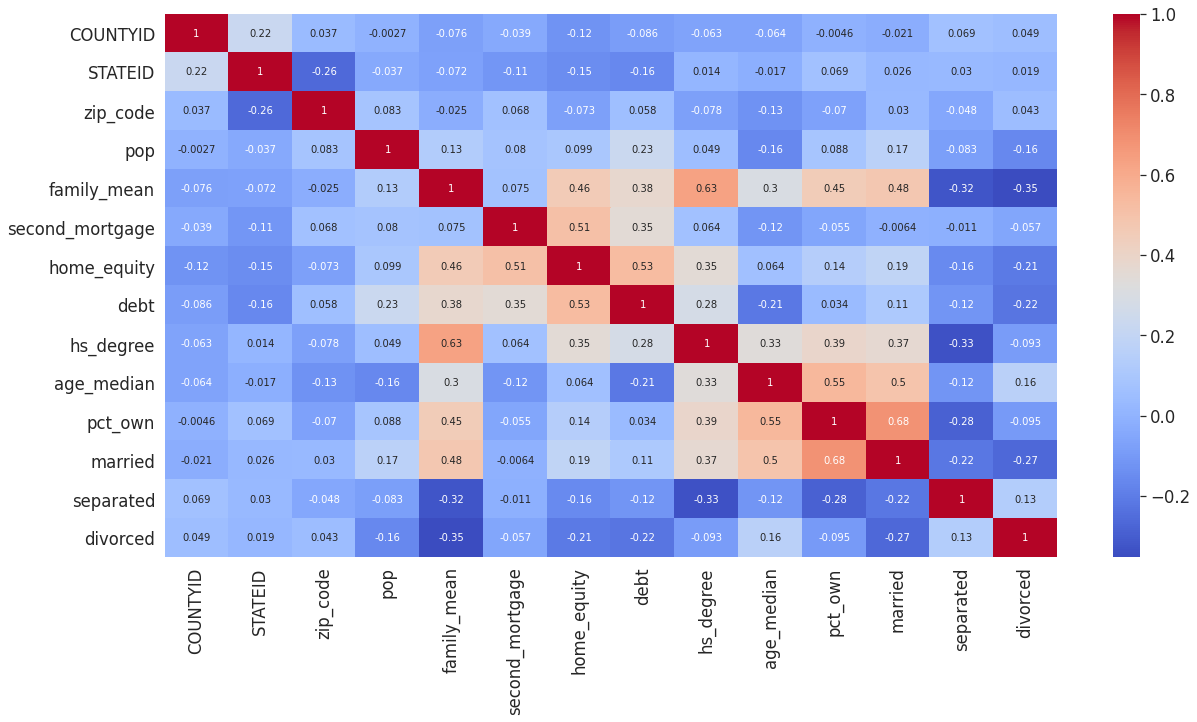

In [59]:
plt.figure(figsize=(20,10))
sns.heatmap(cor,annot=True,cmap='coolwarm')
plt.show()

In [64]:
from sklearn.decomposition import FactorAnalysis
from factor_analyzer import FactorAnalyzer

In [65]:
fa=FactorAnalyzer(n_factors=5)
fa.fit_transform(df_train.select_dtypes(exclude= ('object','category')))
fa.loadings_

array([[-1.12589171e-01,  1.95646472e-02, -2.39331078e-02,
        -6.27632641e-02,  4.23474728e-02],
       [-1.10186766e-01,  1.33506223e-02,  2.79651261e-02,
        -1.49825870e-01,  1.10838809e-01],
       [-8.28678648e-02,  5.16372368e-02, -1.36451865e-01,
        -4.98918576e-02, -1.04024843e-01],
       [ 1.80961127e-02,  1.92013750e-02,  5.81329946e-03,
         2.64842758e-02, -6.12442838e-03],
       [ 9.02324744e-02, -9.72544305e-02, -6.54601348e-02,
        -1.33145904e-01, -1.48594602e-01],
       [-1.07335682e-02, -4.12376815e-02,  1.45853480e-01,
         8.80433059e-03,  1.08227568e-01],
       [-4.28796985e-02, -2.09780216e-02,  3.66726872e-02,
        -9.45597405e-02,  5.91380526e-02],
       [-2.44243072e-03, -1.53245408e-02, -2.68300798e-03,
        -4.52473034e-02,  2.37240644e-02],
       [ 7.92164309e-02,  9.57453339e-01, -8.71151616e-02,
        -6.59923658e-03, -3.97273266e-02],
       [ 7.39808174e-02,  9.18750534e-01, -1.08834838e-01,
        -2.79371571e-02

In [60]:
#pip install pandasql

In [61]:
#pip install cufflinks

In [63]:
#pip install plotly

In [62]:
#pip install plotly-utils

In [66]:
from pandasql import sqldf
q1 = "select place,pct_own,second_mortgage,lat,lng from df_train where pct_own >0.10 and second_mortgage <0.5 order by second_mortgage DESC LIMIT 2500;"
pysqldf = lambda q: sqldf(q, globals())
df_train_location_mort_pct=pysqldf(q1)

In [67]:
df_train.columns

Index(['COUNTYID', 'STATEID', 'state', 'state_ab', 'city', 'place', 'type',
       'primary', 'zip_code', 'area_code', 'lat', 'lng', 'ALand', 'AWater',
       'pop', 'male_pop', 'female_pop', 'rent_mean', 'rent_median',
       'rent_stdev', 'rent_sample_weight', 'rent_samples', 'rent_gt_10',
       'rent_gt_15', 'rent_gt_20', 'rent_gt_25', 'rent_gt_30', 'rent_gt_35',
       'rent_gt_40', 'rent_gt_50', 'universe_samples', 'used_samples',
       'hi_mean', 'hi_median', 'hi_stdev', 'hi_sample_weight', 'hi_samples',
       'family_mean', 'family_median', 'family_stdev', 'family_sample_weight',
       'family_samples', 'hc_mortgage_mean', 'hc_mortgage_median',
       'hc_mortgage_stdev', 'hc_mortgage_sample_weight', 'hc_mortgage_samples',
       'hc_mean', 'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight',
       'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt',
       'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', 'hs_degree',
       'hs_degree_male', 

In [68]:
df_train['type'].unique()
type_dict={'type':{'City':1, 
                   'Urban':2, 
                   'Town':3, 
                   'CDP':4, 
                   'Village':5, 
                   'Borough':6}
          }
df_train.replace(type_dict,inplace=True)

In [69]:
df_train['type'].unique()

array([1, 2, 3, 4, 5, 6])

In [70]:
df_test.replace(type_dict,inplace=True)

In [71]:
df_test['type'].unique()

array([4, 1, 6, 3, 5, 2])

In [72]:
feature_cols=['COUNTYID','STATEID','zip_code','type','pop', 'family_mean',
         'second_mortgage', 'home_equity', 'debt','hs_degree',
           'age_median','pct_own', 'married','separated', 'divorced']

In [73]:
x_train=df_train[feature_cols]
y_train=df_train['hc_mortgage_mean']

In [75]:
x_test=df_test[feature_cols]
y_test=df_test['hc_mortgage_mean']

In [76]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error,accuracy_score

In [77]:
x_train.head()

,COUNTYID,STATEID,zip_code,type,pop,family_mean,second_mortgage,home_equity,debt,hs_degree,age_median,pct_own,married,separated,divorced
UID,,,,,,,,,,,,,,,
267822,53,36,13346,1,5230,67994.14790,0.02077,0.08919,0.52963,0.89288,44.666665,0.79046,0.57851,0.01240,0.08770
246444,141,18,46616,1,2633,50670.10337,0.02222,0.04274,0.60855,0.90487,34.791665,0.52483,0.34886,0.01426,0.09030
245683,63,18,46122,1,6881,95262.51431,0.00000,0.09512,0.73484,0.94288,41.833330,0.85331,0.64745,0.01607,0.10657
279653,127,72,927,2,2700,56401.68133,0.01086,0.01086,0.52714,0.91500,49.750000,0.65037,0.47257,0.02021,0.10106
247218,161,20,66502,1,5637,54053.42396,0.05426,0.05426,0.51938,1.00000,22.000000,0.13046,0.12356,0.00000,0.03109


In [78]:
sc=StandardScaler()
x_train_scaled=sc.fit_transform(x_train)
x_test_scaled=sc.fit_transform(x_test)

In [79]:
linereg=LinearRegression()
linereg.fit(x_train_scaled,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [80]:
y_pred=linereg.predict(x_test_scaled)

In [81]:
print("Overall R2 score of linear regression model", r2_score(y_test,y_pred))
print("Overall RMSE of linear regression model", np.sqrt(mean_squared_error(y_test,y_pred)))

Overall R2 score of linear regression model 0.7348210754610929
Overall RMSE of linear regression model 323.1018894984635


In [82]:
state=df_train['STATEID'].unique()
state[0:5]
#Picking a few iDs 20,1,45,6

array([36, 18, 72, 20,  1])

In [83]:
for i in [20,1,45]:
    print("State ID-",i)
    
    x_train_nation=df_train[df_train['COUNTYID']==i][feature_cols]
    y_train_nation=df_train[df_train['COUNTYID']==i]['hc_mortgage_mean']
    
    x_test_nation=df_test[df_test['COUNTYID']==i][feature_cols]
    y_test_nation=df_test[df_test['COUNTYID']==i]['hc_mortgage_mean']
    
    x_train_scaled_nation=sc.fit_transform(x_train_nation)
    x_test_scaled_nation=sc.fit_transform(x_test_nation)
    
    linereg.fit(x_train_scaled_nation,y_train_nation)
    y_pred_nation=linereg.predict(x_test_scaled_nation)
    
    print("Overall R2 score of linear regression model for state,",i,":-" ,r2_score(y_test_nation,y_pred_nation))
    print("Overall RMSE of linear regression model for state,",i,":-" ,np.sqrt(mean_squared_error(y_test_nation,y_pred_nation)))
    print("\n")

State ID- 20
Overall R2 score of linear regression model for state, 20 :- 0.6046603766461813
Overall RMSE of linear regression model for state, 20 :- 307.97188999314704


State ID- 1
Overall R2 score of linear regression model for state, 1 :- 0.8104382475484617
Overall RMSE of linear regression model for state, 1 :- 307.8275861848434


State ID- 45
Overall R2 score of linear regression model for state, 45 :- 0.7887446497855253
Overall RMSE of linear regression model for state, 45 :- 225.69615420724125




In [84]:
residuals=y_test-y_pred
residuals

UID
255504    281.969088
252676    -69.935775
276314    190.761969
248614   -157.290627
286865     -9.887017
             ...    
238088    -67.541646
242811    -41.578757
250127   -127.427569
241096   -330.820475
287763    217.760642
Name: hc_mortgage_mean, Length: 11709, dtype: float64

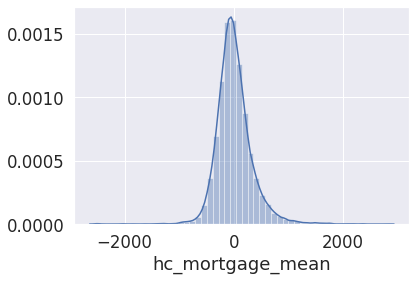

In [85]:
sns.distplot(residuals)

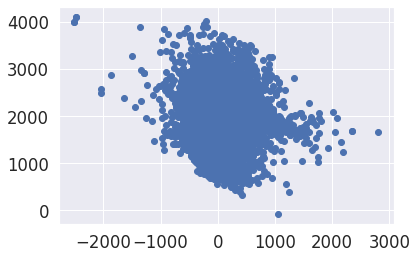

In [86]:
plt.scatter(residuals,y_pred) # Same variance and residuals does not have correlation with predictor
# Independance of residuals